# Checking requisites

In [126]:
! pip install pandas numpy seaborn matplotlib scikit-learn imblearn xgboost

# Importing Libraries

In [127]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import datetime
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Uploading data

In [129]:
d_training = pd.read_csv('./data/base_clientes.csv')
d_out = pd.read_csv('./data/base_hist_churn.csv')
d_price = pd.read_csv('./data/base_precos.csv')

# Exploratory Data Analysis and Cleaning

## Initial descriptive analysis

In [130]:
d_training.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,NaN,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,NaN,...,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,NaN,...,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,NaN,...,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321


In [131]:
d_training.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,2.012000e+04,2.012000e+04,2.012000e+04,4385.000000,4385.000000,4385.000000,4385.000000,20120.000000,20120.000000,...,19970.000000,19970.000000,19970.000000,20120.000000,20105.000000,20105.000000,20120.00000,20102.000000,20120.000000,20116.000000
mean,NaN,1.949648e+05,3.196017e+04,1.953380e+04,344.466267,344.466267,3907.823737,214.150812,2370.826669,1912.253529,...,0.135960,0.052889,43.543557,196.822941,22.475752,21.353071,1.34826,217.304279,5.023658,20.578284
std,NaN,6.754792e+05,1.782284e+05,8.087283e+04,724.065119,724.065119,5700.747714,542.506310,4047.481373,5231.517730,...,0.026286,0.048587,5.173667,498.026444,23.853275,28.838847,1.45777,356.223220,1.678148,21.833836
min,NaN,-1.252760e+05,-4.275000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,-2.090000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-528.640000,-981.560000,1.00000,-4148.990000,1.000000,0.000000
25%,NaN,5.832750e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1162.140000,0.000000,509.840000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.970000,11.950000,1.00000,51.542500,4.000000,12.500000
50%,NaN,1.533450e+04,0.000000e+00,9.060000e+02,162.600000,162.600000,2220.850000,40.830000,1176.745000,378.500000,...,0.142881,0.086163,44.311378,44.820000,21.090000,21.000000,1.00000,119.425000,5.000000,13.856000
75%,NaN,5.035500e+04,0.000000e+00,4.119500e+03,398.500000,398.500000,4273.450000,228.660000,2700.552500,2019.000000,...,0.146348,0.098837,44.311378,220.850000,29.640000,29.500000,1.00000,276.965000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,19021.240000,19021.240000,81122.630000,18267.500000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,18267.500000,500.320000,500.320000,32.00000,24570.650000,16.000000,500.000000


In [132]:
d_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20120 non-null  object 
 1   activity_new              8221 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             14846 non-null  object 
 4   cons_12m                  20120 non-null  int64  
 5   cons_gas_12m              20120 non-null  int64  
 6   cons_last_month           20120 non-null  int64  
 7   date_activ                20120 non-null  object 
 8   date_end                  20118 non-null  object 
 9   date_first_activ          4385 non-null   object 
 10  date_modif_prod           19918 non-null  object 
 11  date_renewal              20076 non-null  object 
 12  forecast_base_bill_ele    4385 non-null   float64
 13  forecast_base_bill_year   4385 non-null   float64
 14  foreca

In [133]:
d_price.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000
mean,0.141013,0.054352,0.030709,43.333166,10.699025,6.458055
std,0.025113,0.050004,0.036324,5.403902,12.853889,7.783320
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085474,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101674,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [134]:
d_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241238 entries, 0 to 241237
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            241238 non-null  object 
 1   price_date    241238 non-null  object 
 2   price_p1_var  239577 non-null  float64
 3   price_p2_var  239577 non-null  float64
 4   price_p3_var  239577 non-null  float64
 5   price_p1_fix  239577 non-null  float64
 6   price_p2_fix  239577 non-null  float64
 7   price_p3_fix  239577 non-null  float64
dtypes: float64(6), object(2)
memory usage: 14.7+ MB


In [135]:
d_out.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [136]:
d_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [137]:

d_training.shape

(20120, 32)

In [138]:
d_training.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

<Axes: xlabel='Features', ylabel='Missing values (%)'>

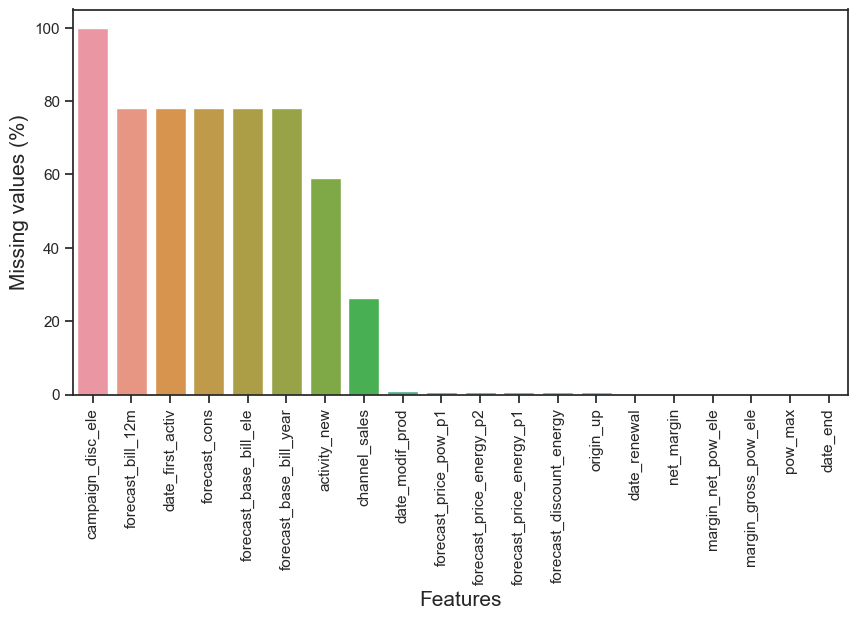

In [139]:
nan_count = ((d_training.isnull().sum()/d_training.shape[0])*100).sort_values(ascending=False)
nan_count = nan_count[nan_count>0]
plt.figure(figsize=(10,5))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Missing values (%)', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=nan_count.index, y=nan_count.values)

Campaign_disc_ele is 100% empty! 

Removing it and the others 5 features with high null percentage...

In [140]:
d_training.drop(nan_count.index[:6],axis=1,inplace=True)
d_training.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,27/08/2021,07/09/2021,...,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,13/12/2016,01/01/2022,...,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,27/08/2021,05/09/2021,...,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
3,cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,03/01/2017,03/01/2023,03/01/2017,04/01/2022,...,44.311378,f,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
4,c7c8ee9daf2a864d159d45a2373ada72,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,07/10/2017,07/10/2022,27/08/2021,09/10/2021,...,44.311378,f,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150


In [141]:
d_training['activity_new'] = d_training['activity_new'].fillna('new activity')
d_training['channel_sales'] = d_training['channel_sales'].fillna('new channel')

In [142]:
d_training[nan_count.index[7:]].nunique()

channel_sales                   8
date_modif_prod              2423
forecast_price_pow_p1          48
forecast_price_energy_p2      439
forecast_price_energy_p1      658
forecast_discount_energy       14
origin_up                       6
date_renewal                  420
net_margin                  15761
margin_net_pow_ele           3338
margin_gross_pow_ele         3304
pow_max                       985
date_end                      372
dtype: int64

In [143]:
d_training[nan_count.index[7:]].isnull().sum()

channel_sales                 0
date_modif_prod             202
forecast_price_pow_p1       150
forecast_price_energy_p2    150
forecast_price_energy_p1    150
forecast_discount_energy    150
origin_up                   114
date_renewal                 44
net_margin                   18
margin_net_pow_ele           15
margin_gross_pow_ele         15
pow_max                       4
date_end                      2
dtype: int64

Filling missing dates with the next row.

In [144]:
d_training[['date_modif_prod','date_renewal','date_end']] = d_training[['date_modif_prod','date_renewal', 'date_end']].fillna(method='bfill')

Replacing missing values with most frequent.

In [145]:
origin_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
d_training[['origin_up']] = origin_imp.fit_transform(d_training[['origin_up']])

In [146]:
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
d_training[[x for x in nan_count.index[7:] if x not in ['date_modif_prod', 'date_renewal','origin_up','date_end']]] = imp_freq.fit_transform(
    d_training[[x for x in nan_count.index[7:] if x not in ['date_modif_prod', 'date_renewal','origin_up','date_end']]])

In [147]:
df = pd.merge(d_training, d_out, on=['id'])


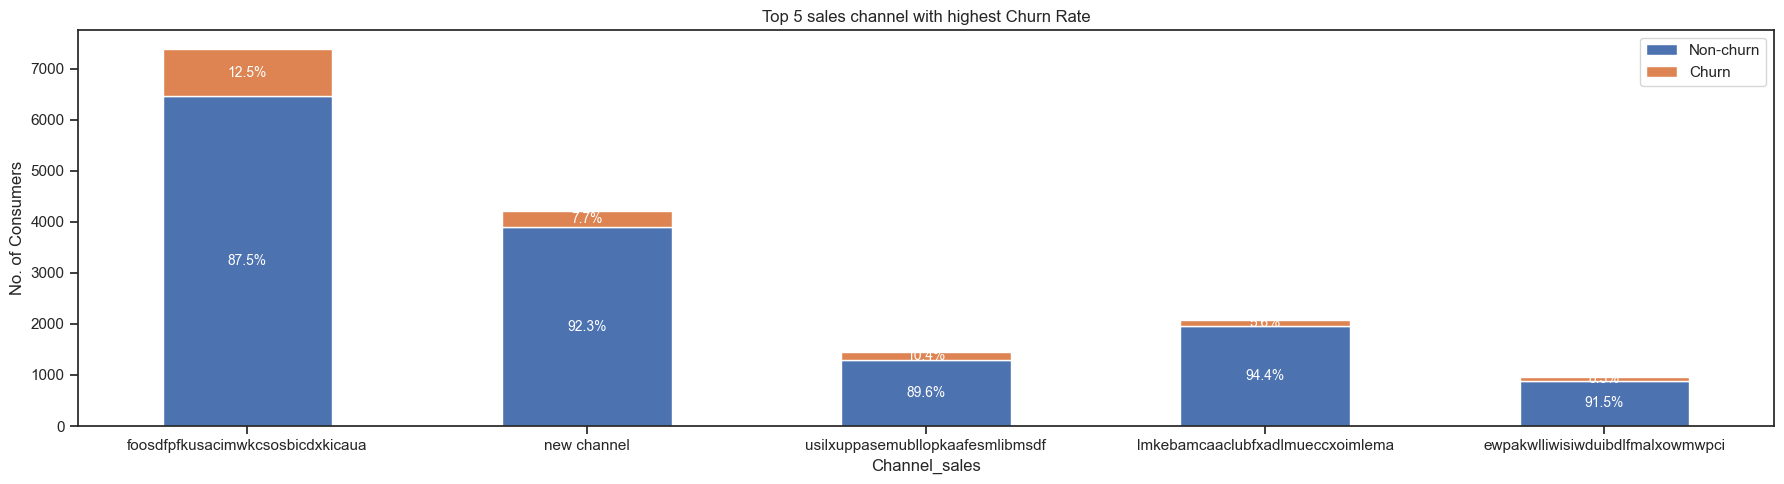

In [148]:
sales = df[["channel_sales", "churn", "id"]].groupby([
    "channel_sales", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:5]
sales_percentage = (sales.div(sales.sum(axis=1), axis=0) * 100)

# Plotting
ax = sales.plot(kind="bar", figsize=(18, 5), stacked=True, rot=0, title="Top 5 sales channel with highest Churn Rate")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in sales.index}

# Add percentage annotations to each bar
for channel in sales.index:
    for col in sales.columns:
        value = sales.loc[channel, col]
        percentage = sales_percentage.loc[channel, col]
        
        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[channel] + value/2
        ax.text(sales.index.get_loc(channel), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)
        
        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[channel] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("Channel_sales")
plt.tight_layout()
plt.show()


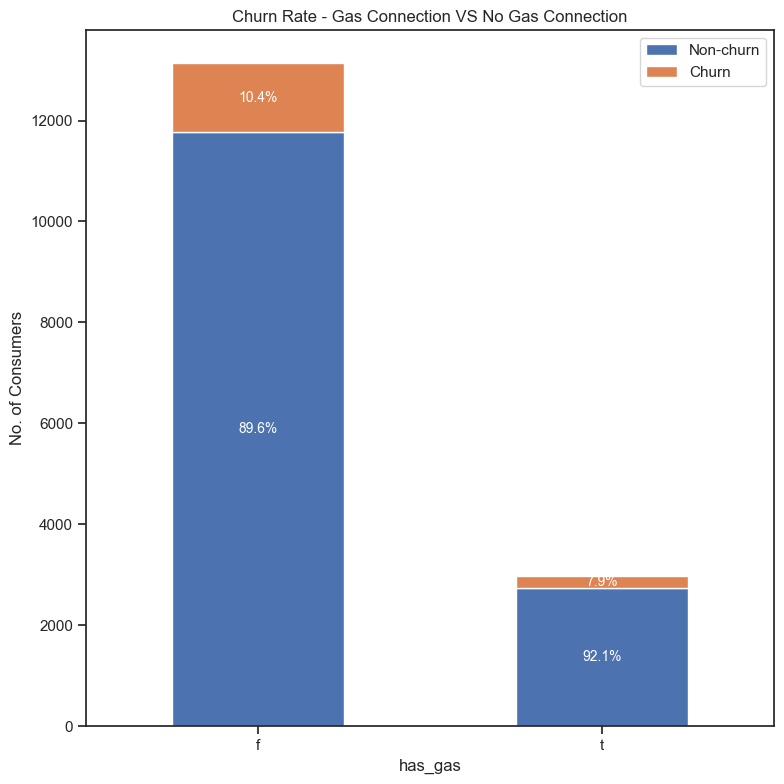

In [149]:
cons_12m = df[["has_gas", "churn", "id"]].groupby([
    "has_gas", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(8, 8), stacked=True, rot=0, title="Churn Rate - Gas Connection VS No Gas Connection")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for gas_status in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[gas_status, col]
        percentage = cons_12m_percentage.loc[gas_status, col]
        
        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[gas_status] + value/2
        ax.text(cons_12m.index.get_loc(gas_status), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)
        
        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[gas_status] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("has_gas")
plt.tight_layout()
plt.show()


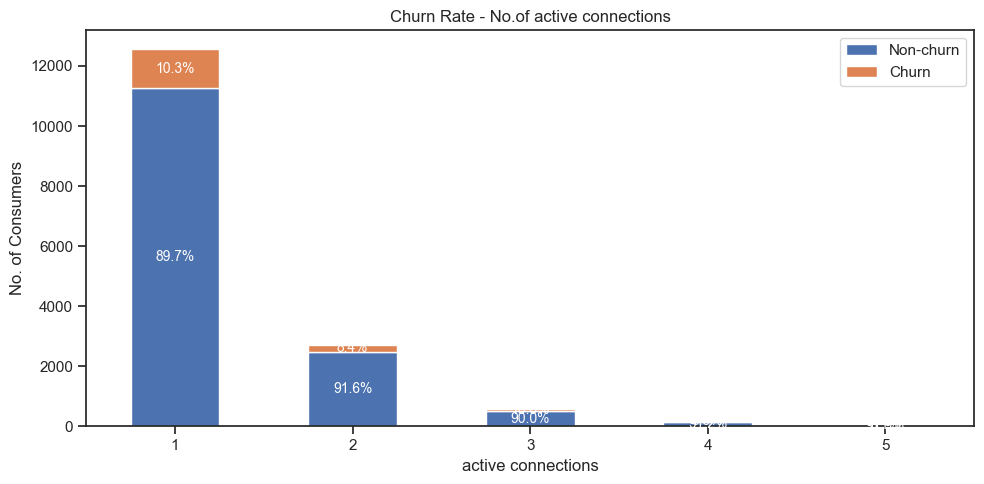

In [150]:
cons_12m = df[["nb_prod_act", "churn", "id"]].groupby([
    "nb_prod_act", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:5]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(10, 5), stacked=True, rot=0, title="Churn Rate - No.of active connections")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for conn_status in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[conn_status, col]
        percentage = cons_12m_percentage.loc[conn_status, col]
        
        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[conn_status] + value/2
        ax.text(cons_12m.index.get_loc(conn_status), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)
        
        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[conn_status] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("active connections")
plt.tight_layout()
plt.show()

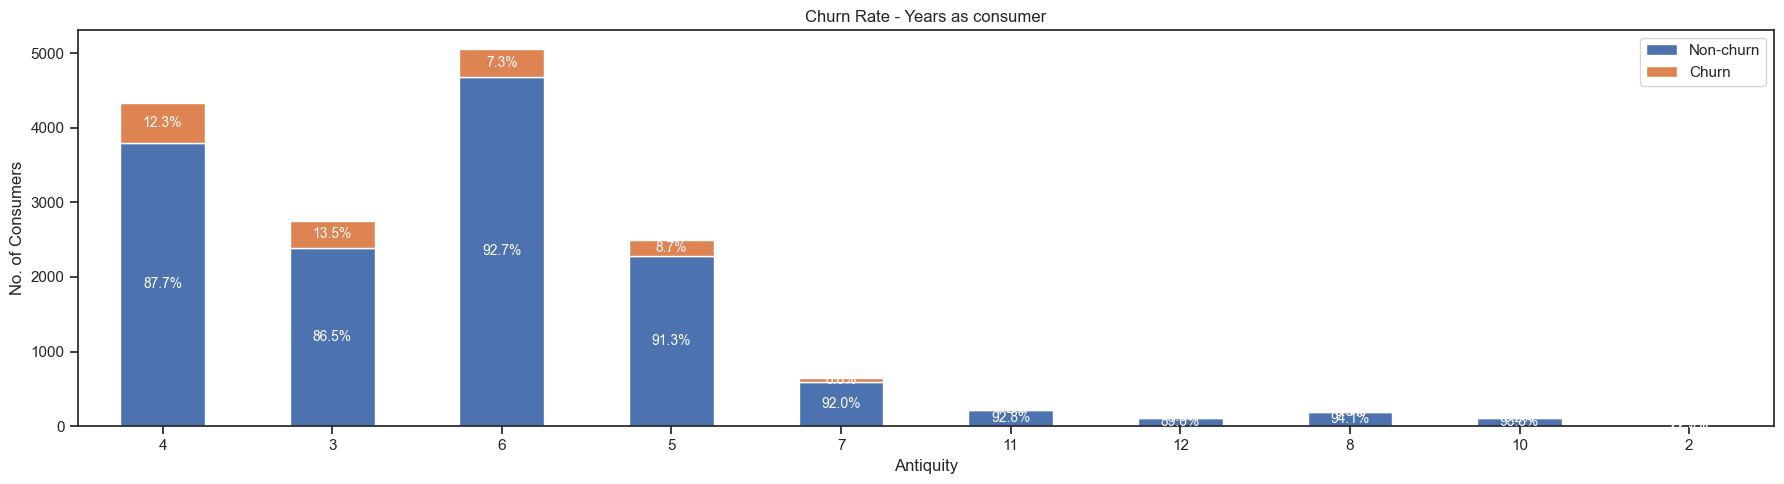

In [151]:
cons_12m = df[["num_years_antig", "churn", "id"]].groupby([
    "num_years_antig", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:10]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(18, 5), stacked=True, rot=0, title="Churn Rate - Years as consumer")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for year in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[year, col]
        percentage = cons_12m_percentage.loc[year, col]
        
        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[year] + value/2
        ax.text(cons_12m.index.get_loc(year), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)
        
        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[year] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("Antiquity")
plt.tight_layout()
plt.show()

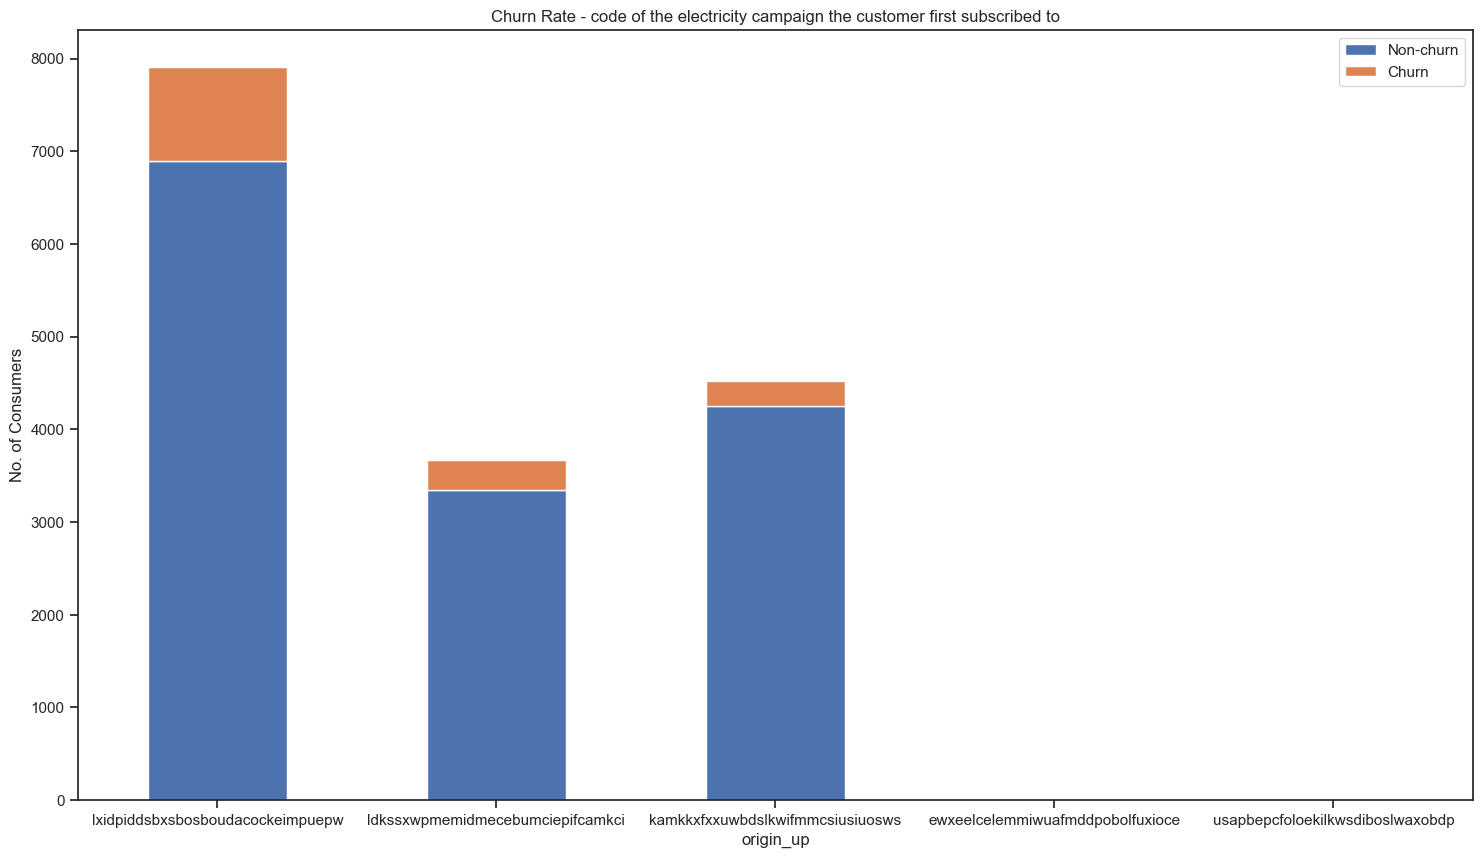

In [152]:
cons_12m = df[["origin_up",
               "churn", "id"]].groupby([
    "origin_up","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0)*100)
cons_12m.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Churn Rate - code of the electricity campaign the customer first subscribed to")
# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("origin_up")
plt.show()

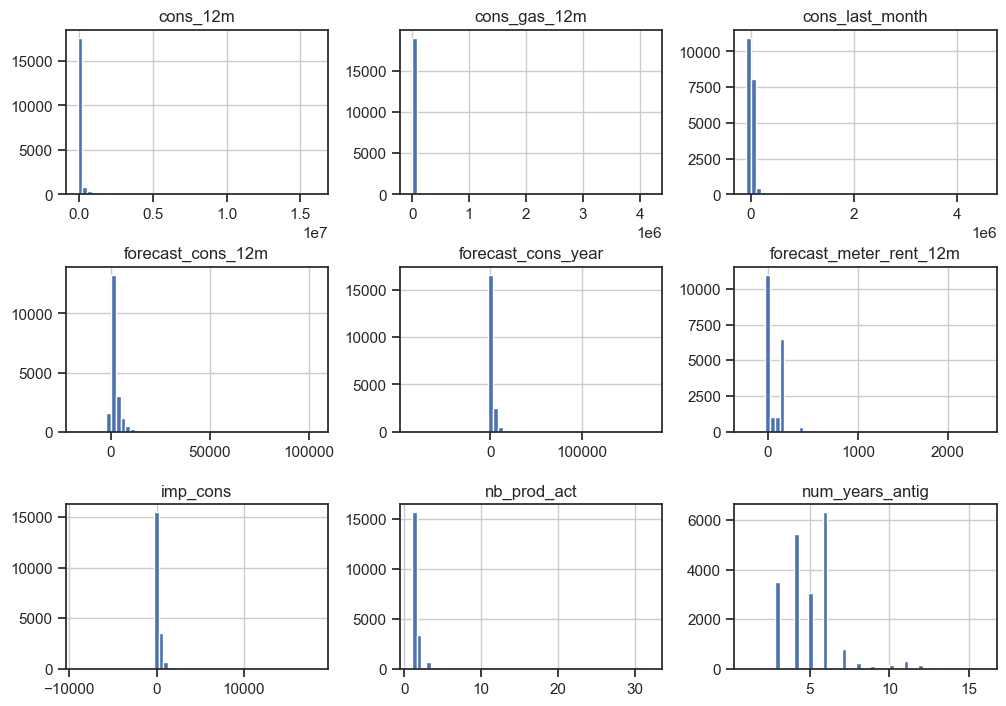

In [153]:
d_training.hist(bins=50, figsize=(10,7))
plt.tight_layout(pad=0.4)
plt.show()

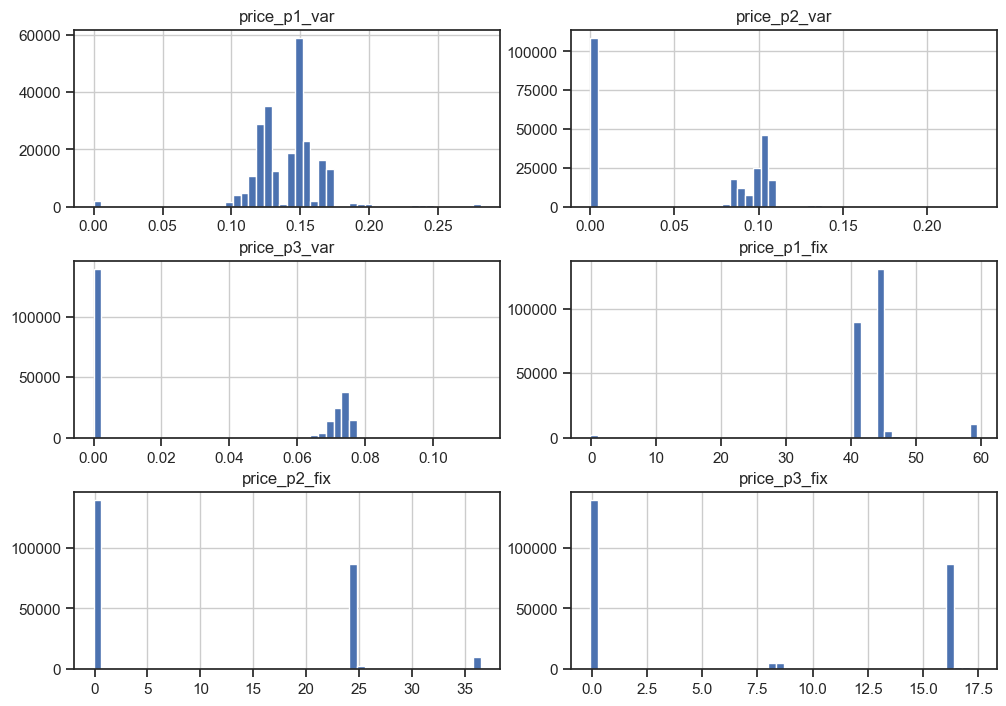

In [154]:
d_price.hist(bins=50, figsize=(10,7))
plt.tight_layout(pad=0.4)
plt.show()

In [155]:
# List of date columns
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

# For each column, remove problematic dates
for col in date_columns:
    mask = pd.to_datetime(df[col], dayfirst=True, errors='coerce').isna()
    problematic_dates = df[col][mask]
    
    # If there are problematic dates, print them and remove associated rows
    if len(problematic_dates) > 0:
        print(f"Problematic dates in {col}:")
        print(problematic_dates)
        df.drop(index=problematic_dates.index, inplace=True)

# Convert each column to DateTime format
for col in date_columns:
    df[col] = pd.to_datetime(df[col], dayfirst=True)

Problematic dates in date_activ:
1264     29/02/2018
1577     29/02/2018
4218     29/02/2018
6302     29/02/2018
7246     29/02/2018
8648     29/02/2018
13622    29/02/2018
15115    29/02/2018
Name: date_activ, dtype: object
Problematic dates in date_end:
47       29/02/2022
572      29/02/2022
1644     29/02/2022
1888     29/02/2022
2163     29/02/2022
            ...    
15304    29/02/2022
15557    29/02/2022
15574    29/02/2022
15654    29/02/2022
15788    29/02/2022
Name: date_end, Length: 65, dtype: object


## Identification of numerical and categorical columns

In [156]:
numerica_cols = ["cons_12m", "cons_gas_12m", "cons_last_month", "date_activ", "date_end", "date_first_activ", "date_modif_prod", "date_renewal", "forecast_base_bill_ele", "forecast_base_bill_year", "forecast_bill_12m", "forecast_cons", "forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy", "forecast_meter_rent_12m", "forecast_price_energy_p1", "forecast_price_energy_p2", "forecast_price_pow_p1", "imp_cons", "margin_gross_pow_ele", "margin_net_pow_ele", "nb_prod_act", "net_margin", "num_years_antig", "pow_max"]
categorica_cols = ["id", "activity_new", "campaign_disc_ele", "channel_sales", "has_gas", "origin_up", "churn"]

print('Colunas numéricas:', numerica_cols)
print('Colunas categóricas:', categorica_cols)

Colunas numéricas: ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']
Colunas categóricas: ['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'has_gas', 'origin_up', 'churn']


# Descriptive analysis after data processing

In [157]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,imp_cons,nb_prod_act,num_years_antig,churn
count,1.602300e+04,1.602300e+04,1.602300e+04,16023,16023,16023,16023,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000
mean,1.945781e+05,3.200227e+04,1.943322e+04,2017-01-17 00:27:35.420333312,2022-07-28 06:27:20.591649536,2018-12-14 07:59:54.607751424,2021-07-21 13:32:09.750982912,2369.506865,1906.893840,70.322933,196.024253,1.348312,5.029895,0.099170
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,2006-07-25 00:00:00,2012-08-26 00:00:00,2006-07-25 00:00:00,2019-06-26 00:00:00,-16689.260000,-85627.000000,-242.960000,-9038.210000,1.000000,1.000000,0.000000
25%,5.895500e+03,0.000000e+00,0.000000e+00,2016-01-12 00:00:00,2022-04-30 00:00:00,2016-08-08 00:00:00,2021-04-21 00:00:00,512.500000,0.000000,16.230000,0.000000,1.000000,4.000000,0.000000
50%,1.530300e+04,0.000000e+00,8.980000e+02,2017-03-04 00:00:00,2022-07-31 00:00:00,2019-04-29 00:00:00,2021-07-27 00:00:00,1178.310000,377.000000,19.440000,44.320000,1.000000,5.000000,0.000000
75%,5.006350e+04,0.000000e+00,4.115500e+03,2018-04-27 00:00:00,2022-11-01 00:00:00,2021-05-24 00:00:00,2021-10-30 00:00:00,2689.435000,1992.500000,131.485000,217.610000,1.000000,6.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,2020-09-01 00:00:00,2023-06-13 00:00:00,2022-01-29 00:00:00,2022-01-28 00:00:00,103801.930000,175375.000000,2411.690000,15042.790000,32.000000,16.000000,1.000000
std,6.801762e+05,1.779524e+05,8.245585e+04,NaN,NaN,NaN,NaN,4039.712325,5264.374084,79.038711,494.967193,1.462746,1.675651,0.298899


# Graphs to visualize the relationship between the chosen variables

c:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


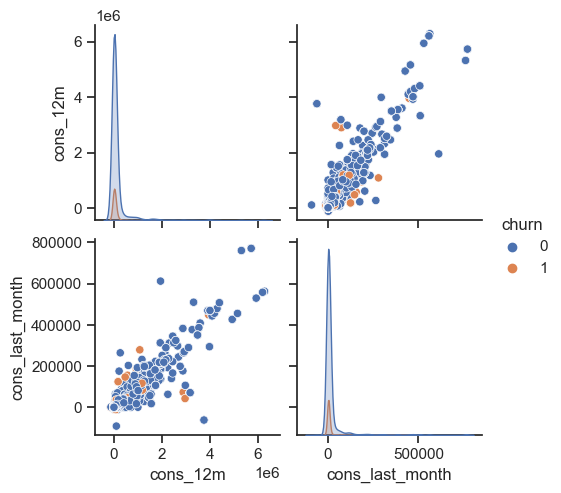

In [158]:
test_regressão = df[['cons_12m', 'cons_last_month','churn']]
teste = test_regressão['cons_12m'].idxmax()
df_without_high_cons = test_regressão.drop(teste)

sns.set(style="ticks")
sns.pairplot(df_without_high_cons, hue="churn")
plt.show()

c:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


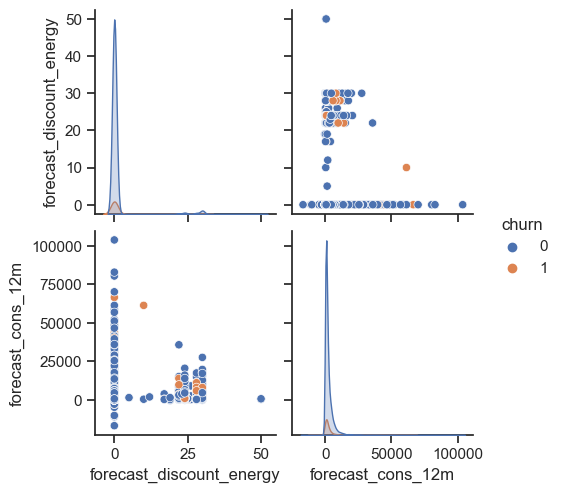

In [159]:
test_regressão = df[['forecast_discount_energy', 'forecast_cons_12m','churn']]


sns.set(style="ticks")
sns.pairplot(test_regressão, hue="churn")
plt.show()

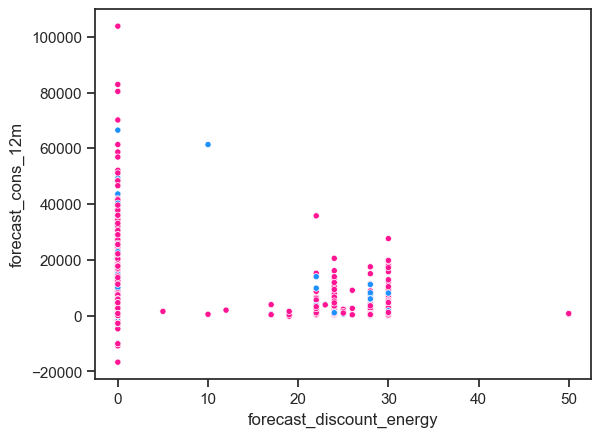

In [160]:
# Creating the scatter plot
colors = df['churn'].map({1: 'dodgerblue', 0: 'deeppink'})
ax = df.plot.scatter(x='forecast_discount_energy', y='forecast_cons_12m', c = colors, edgecolors='w', linewidth=0.5)

# Showing the chart
plt.show()

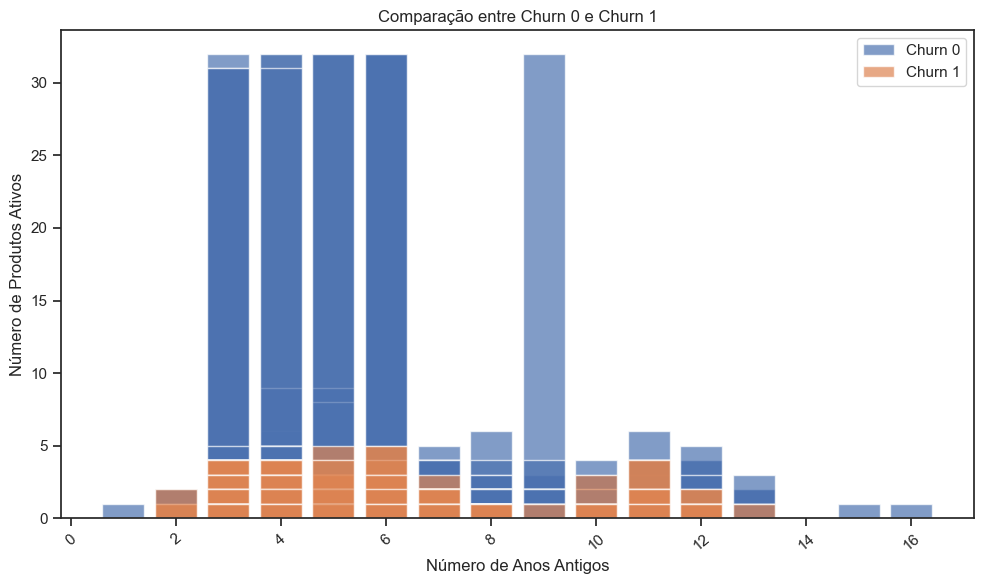

In [161]:
churn0= df[df['churn'] == 0]
churn1= df[df['churn'] == 1]
plt.figure(figsize=(10, 6))
plt.bar(churn0['num_years_antig'], churn0['nb_prod_act'], label='Churn 0', alpha=0.7)
plt.bar(churn1['num_years_antig'], churn1['nb_prod_act'], label='Churn 1', alpha=0.7)
plt.xlabel('Número de Anos Antigos')
plt.ylabel('Número de Produtos Ativos')
plt.title('Comparação entre Churn 0 e Churn 1')
plt.xticks(rotation=40)
plt.legend()

plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x1a1e43d5bd0>,
 [Text(-1.0470449880908288, 0.33718955042212767, '0'),
  Text(1.0470449565208602, -0.3371896484535525, '1')],
 [Text(-0.5711154480495428, 0.18392157295752415, '90.1%'),
  Text(0.5711154308295601, -0.18392162642921042, '9.9%')])

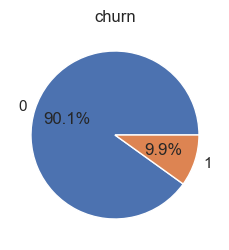

In [162]:
sizes = df['churn'].value_counts(sort = True)
labels = np.unique(df.churn)
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("churn")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Feature Engineering

In [163]:
df.dtypes

id                                  object
activity_new                        object
channel_sales                       object
cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy            object
forecast_meter_rent_12m            float64
forecast_price_energy_p1            object
forecast_price_energy_p2            object
forecast_price_pow_p1               object
has_gas                             object
imp_cons                           float64
margin_gross_pow_ele                object
margin_net_pow_ele                  object
nb_prod_act                          int64
net_margin                          object
num_years_a

In [164]:
# Converter a coluna 'channel_sales' para strings
df['channel_sales'] = df['channel_sales'].astype(str)

# Valores que você deseja verificar
values_to_check = ['foosdfpfkusacimwkcsosbicdxkicaua', 'usilxuppasemubllopkaafesmlibmsdf', 'fmwdwsxillemwbbwelxsampiuwwpcdcb', 'ewpakwlliwisiwduibdlfmalxowmwpci']

# Criar colunas binárias para cada valor
for value in values_to_check:
    df[value] = df['channel_sales'].str.contains(value).astype(int)

# Drop da coluna original 'channel_sales' se não for mais necessária
df.drop(columns=['channel_sales'], inplace=True)

In [165]:
# Converter a coluna 'channel_sales' para strings
df['activity_new'] = df['activity_new'].astype(str)

# Valores que você deseja verificar
values_to_check = ['apdekpcbwosbxepsfxclislboipuxpop', 'kkklcdamwfafdcfwofuscwfwadblfmce', 'kwuslieomapmswolewpobpplkaooaaew', 'fmwdwsxillemwbbwelxsampiuwwpcdcb',
                   'ckfxocssowaeipxueikxcmaxdmcduxsa','xumuokeiidieboawuxkidxufcexecbbl','udmdflpapcfbfpcxbwlbcubxkfoiwaff','kcioolmpmuxpoeuicskiafwcmadeflfc',
                   'oolfsafdpblfmubuscwbbuifuxdxkfsd','xwkiacfesppesmilbxkmbmwdopsmslwp','kllldxcildwkssbmoabmsdffmawsafsf','ikofkbbsefbpasiomapclxkddisloube',
                   'bxbkdblfpallcawfcfuecaxlaalimica','updsxswiffpfixmssiwcfociadowkbsc','ewaupfkppoboxiuilledxxlwieawexel']

# Criar colunas binárias para cada valor
for value in values_to_check:
    df[value] = df['activity_new'].str.contains(value).astype(int)

# Drop da coluna original 'channel_sales' se não for mais necessária
df.drop(columns=['activity_new'], inplace=True)

In [166]:
# Lista dos valores únicos no campo "origin_up"
unique_values = ['lxidpiddsbxsbosboudacockeimpuepw', 'ldkssxwpmemidmecebumciepifcamkci', 'kamkkxfxxuwbdslkwifmmcsiusiuosws']

# Criação das colunas binárias
dummies = df['origin_up'].str.get_dummies(', '.join(unique_values))

# Adicionar as colunas binárias ao DataFrame original
df = pd.concat([df, dummies], axis=1)

# Drop da coluna original "origin_up" se não for mais necessária
df.drop(columns=['origin_up'], inplace=True)


In [167]:
df

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,kllldxcildwkssbmoabmsdffmawsafsf,ikofkbbsefbpasiomapclxkddisloube,bxbkdblfpallcawfcfuecaxlaalimica,updsxswiffpfixmssiwcfociadowkbsc,ewaupfkppoboxiuilledxxlwieawexel,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2018-11-07,2022-11-06,2018-11-07,2021-11-09,26520.30,10025,...,0,0,0,0,0,0,0,1,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2019-06-15,2022-06-15,2015-08-21,2021-06-23,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2015-08-21,2022-08-30,2015-08-21,2021-08-31,189.95,0,...,0,0,0,0,0,0,1,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,2016-04-16,2022-04-16,2016-04-16,2021-04-17,47.96,0,...,0,0,0,0,0,0,1,0,0,0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,2016-03-30,2022-03-30,2016-03-30,2021-03-31,240.04,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,32270,47940,0,2018-05-24,2022-05-08,2021-05-08,2020-05-26,4648.01,0,...,0,0,0,0,0,0,0,0,1,0
16092,d0a6f71671571ed83b2645d23af6de00,7223,0,181,2018-08-27,2022-08-27,2018-08-27,2021-08-28,631.69,181,...,0,0,0,0,0,0,0,0,1,0
16093,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,2018-02-08,2022-02-07,2018-02-08,2021-02-09,190.39,179,...,0,0,0,0,0,0,0,0,1,0
16094,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,2018-08-30,2022-08-30,2018-08-30,2021-08-31,19.34,0,...,0,0,0,0,0,0,0,0,1,0


In [168]:
df['contract_tenure'] = df['date_end']-df['date_activ']
df['contract_tenure'] = df['contract_tenure'].apply(lambda x:x.days)

In [169]:
df['renovation_tenure'] = df['date_renewal']-df['date_modif_prod']
df['renovation_tenure'] = df['renovation_tenure'].apply(lambda x:x.days)

In [170]:
df['contract_tenure_year'] = df['contract_tenure'].apply(lambda x:int(np.round(x/365)))

separation columns into quarters

In [171]:
d_price['price_date'] = pd.to_datetime(d_price['price_date'])

# Definindo as datas de início e fim para cada trimestre
trimestre1_start = pd.Timestamp('2021-01-01')
trimestre1_end = pd.Timestamp('2021-03-31')
trimestre2_start = pd.Timestamp('2021-04-01')
trimestre2_end = pd.Timestamp('2021-06-30')
trimestre3_start = pd.Timestamp('2021-07-01')
trimestre3_end = pd.Timestamp('2021-09-30')
trimestre4_start = pd.Timestamp('2021-10-01')
trimestre4_end = pd.Timestamp('2021-12-31')

# Lista das colunas de preço e fixas
price_columns = ['price_p1_var', 'price_p2_var', 'price_p3_var']
fix_columns = ['price_p1_fix', 'price_p2_fix', 'price_p3_fix']

# Criação das colunas trimestrais com as médias dos preços
for i, (start_date, end_date) in enumerate([(trimestre1_start, trimestre1_end),
                                             (trimestre2_start, trimestre2_end),
                                             (trimestre3_start, trimestre3_end),
                                             (trimestre4_start, trimestre4_end)], start=1):
    d_price['trimestre{}_mean'.format(i)] = d_price[(d_price['price_date'] >= start_date) & (d_price['price_date'] <= end_date)][price_columns].mean(axis=1)

# Criação das colunas com as médias dos preços fixos
for i, fix_col in enumerate(fix_columns, start=1):
    d_price['media{}_mean'.format(i)] = d_price[fix_col]

# Selecionando apenas as colunas relevantes
columns_to_keep = ['id'] + ['trimestre{}_mean'.format(i) for i in range(1, 5)] + ['media{}_mean'.format(i) for i in range(1, 4)]
dd_unique = d_price[columns_to_keep].drop_duplicates(subset=['id'])

# Eliminar IDs duplicados

# Juntando as informações calculadas ao DataFrame original 'df'
df = pd.merge(d_price, df, on='id', how='left')

df = df.drop_duplicates(subset=['id'])


# Exibindo o DataFrame final
print(df)

                                      id price_date  price_p1_var  \
0       3acc714fbd9b3ccaac3c412cf220e929 2021-01-01      0.168185   
12      cd0e9211c709585dacc63a0bc89e54bf 2021-01-01      0.151367   
24      0d46a2151788af3f93620d4f598e3f76 2021-01-01      0.127710   
36      73df0b25958255f478ddfdf5a7a3e1fb 2021-01-01      0.153159   
48      c8f997f57c51f9429d546cdbe7ce93c2 2021-01-01      0.122508   
...                                  ...        ...           ...   
241178  cd622263c26436d1237e94ff05cdd506 2021-01-01      0.151367   
241190  ed3434c3c1e2056d1a313e2671815e4d 2021-01-01      0.128069   
241202  d00da2c0c568614b9937791f681cd7d7 2021-01-01      0.150211   
241214  045f94f0b7f538a8d8fae11080abb5da 2021-01-01      0.151367   
241226  16f51cdc2baa19af0b940ee1b3dd17d5 2021-01-01      0.129444   

        price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix  \
0           0.084213      0.000000     44.266931      0.000000      0.000000   
12         

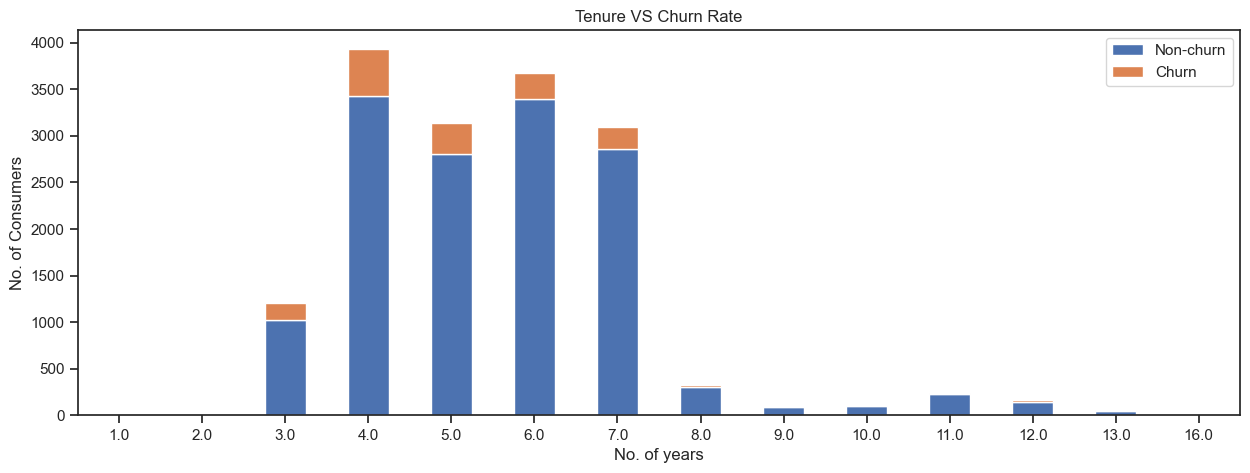

In [172]:
tenure = df[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
tenure.plot(kind="bar",
 figsize=(15,5),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate")
# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

It appears that medium-term contracts have the most churn by far...

Calculating the deviation between last month bill and last 12 months average:

In [173]:
df['bill_dev'] = (df['cons_12m']/12) - df['cons_last_month']

Calculate the ratio of last 12month consumption to next 12 month forecasted consumption:

In [174]:
def handleInf(x):
    if x==float('-inf') or x==float('inf'):
        return 0

In [175]:
df['cons_pattern'] = df['forecast_cons_12m'] / df['cons_12m']
df.cons_pattern = df.cons_pattern.apply(handleInf)

In [176]:
d_price.shape

(241238, 15)

In [177]:
d_price.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,trimestre1_mean,trimestre2_mean,trimestre3_mean,trimestre4_mean,media1_mean,media2_mean,media3_mean
0,3acc714fbd9b3ccaac3c412cf220e929,2021-01-01,0.168185,0.084213,0.0,44.266931,0.0,0.0,0.084133,NaN,NaN,NaN,44.266931,0.0,0.0
1,3acc714fbd9b3ccaac3c412cf220e929,2021-01-02,0.168185,0.084213,0.0,44.266931,0.0,0.0,0.084133,NaN,NaN,NaN,44.266931,0.0,0.0
2,3acc714fbd9b3ccaac3c412cf220e929,2021-01-03,0.168185,0.084213,0.0,44.266931,0.0,0.0,0.084133,NaN,NaN,NaN,44.266931,0.0,0.0


In [178]:
(d_price.isnull().sum()/d_price.shape[0])*100

id                   0.000000
price_date           0.000000
price_p1_var         0.688532
price_p2_var         0.688532
price_p3_var         0.688532
price_p1_fix         0.688532
price_p2_fix         0.688532
price_p3_fix         0.688532
trimestre1_mean      0.688532
trimestre2_mean    100.000000
trimestre3_mean    100.000000
trimestre4_mean    100.000000
media1_mean          0.688532
media2_mean          0.688532
media3_mean          0.688532
dtype: float64

In [179]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
d_price[['price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']] = imp_freq.fit_transform(
    d_price[['price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']])

In [180]:
d_price['price_p1'] = d_price['price_p1_var'] + d_price['price_p1_fix']
d_price['price_p2'] = d_price['price_p2_var'] + d_price['price_p2_fix']
d_price['price_p3'] = d_price['price_p3_var'] + d_price['price_p3_fix']
d_price['pp12'] = d_price['price_p2'] - d_price['price_p1']
d_price['pp23'] = d_price['price_p3'] - d_price['price_p2']
d_price['pp13'] = d_price['price_p3'] - d_price['price_p1']

In [181]:
d_price.drop(['price_p1_var','price_p2_var','price_p3_var',
                'price_p1_fix','price_p2_fix','price_p3_fix'],inplace=True,axis=1)

In [182]:
df = pd.merge(d_price, df, on=['id'])

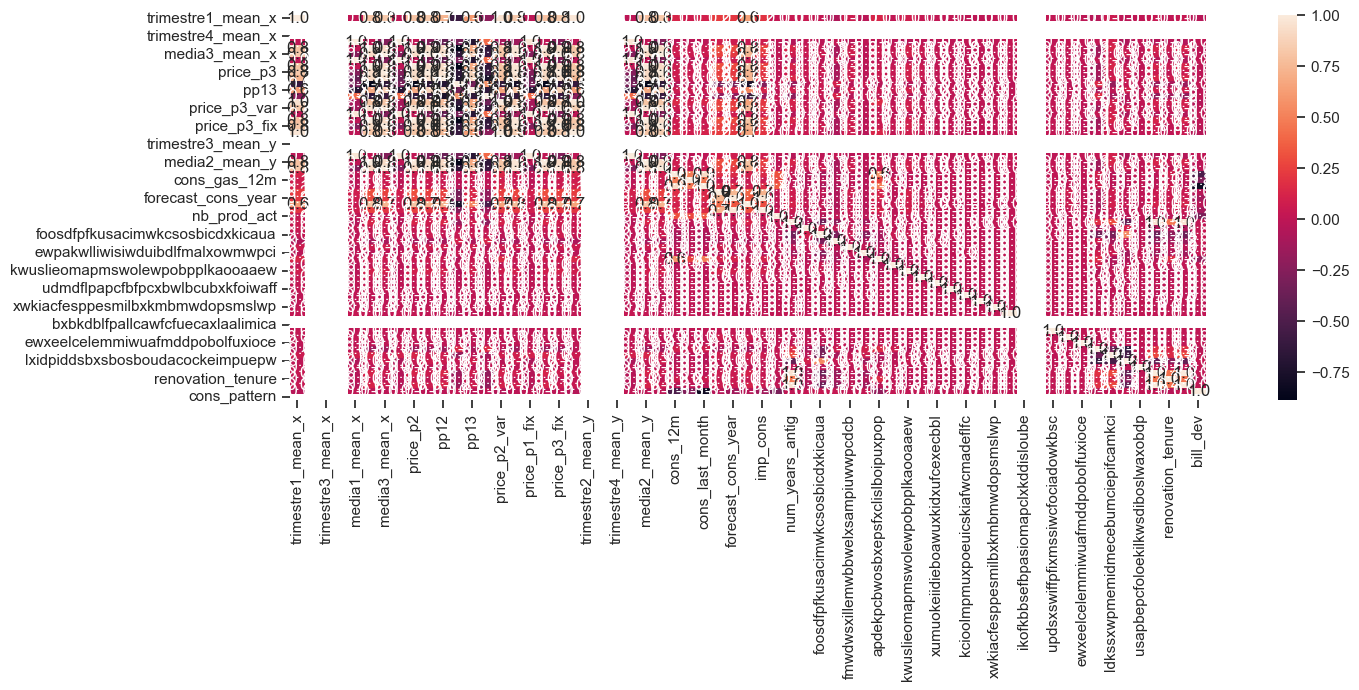

In [183]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15,5))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".1f");

In [184]:


df = df[~(df < 0).any(axis=1)]


# df = df.astype(int)
# df = df[(df >= 0).all(axis=1)]

In [185]:
df

,id,price_date_x,trimestre1_mean_x,trimestre2_mean_x,trimestre3_mean_x,trimestre4_mean_x,media1_mean_x,media2_mean_x,media3_mean_x,price_p1,...,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp,contract_tenure,renovation_tenure,contract_tenure_year,bill_dev,cons_pattern
0,3acc714fbd9b3ccaac3c412cf220e929,2021-01-01,0.084133,NaN,NaN,NaN,44.266931,0.00000,0.000000,44.435116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3acc714fbd9b3ccaac3c412cf220e929,2021-01-02,0.084133,NaN,NaN,NaN,44.266931,0.00000,0.000000,44.435116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3acc714fbd9b3ccaac3c412cf220e929,2021-01-03,0.084133,NaN,NaN,NaN,44.266931,0.00000,0.000000,44.435116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3acc714fbd9b3ccaac3c412cf220e929,2021-01-04,0.084133,NaN,NaN,NaN,44.266931,0.00000,0.000000,44.435116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3acc714fbd9b3ccaac3c412cf220e929,2021-01-05,0.084133,NaN,NaN,NaN,44.266930,0.00000,0.000000,44.435115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241233,16f51cdc2baa19af0b940ee1b3dd17d5,2021-01-08,0.099468,NaN,NaN,NaN,40.728885,24.43733,16.291555,40.848801,...,0.0,0.0,0.0,1.0,0.0,1461.0,360.0,4.0,-315.666667,NaN
241234,16f51cdc2baa19af0b940ee1b3dd17d5,2021-01-09,0.099468,NaN,NaN,NaN,40.728885,24.43733,16.291555,40.848801,...,0.0,0.0,0.0,1.0,0.0,1461.0,360.0,4.0,-315.666667,NaN
241235,16f51cdc2baa19af0b940ee1b3dd17d5,2021-01-10,0.099468,NaN,NaN,NaN,40.728885,24.43733,16.291555,40.848801,...,0.0,0.0,0.0,1.0,0.0,1461.0,360.0,4.0,-315.666667,NaN
241236,16f51cdc2baa19af0b940ee1b3dd17d5,2021-01-11,0.099468,NaN,NaN,NaN,40.728885,24.43733,16.291555,40.848801,...,0.0,0.0,0.0,1.0,0.0,1461.0,360.0,4.0,-315.666667,NaN


# Training with the Randon Forest


In [186]:
df = df.astype(int)

ValueError: invalid literal for int() with base 10: '3acc714fbd9b3ccaac3c412cf220e929'

In [ ]:
y = df['churn']
X = df.drop("id",'date_activ','date_end','date_modif_prod','date_renewal','churn', axis=1)  # Supondo que 'churn' seja a coluna de target


In [ ]:
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
# Inicializar o modelo Random Forest
model = RandomForestClassifier(random_state=42)

In [ ]:
# Treinar o modelo
model.fit(X_train, y_train)

In [ ]:
# Fazer previsões
y_pred = model.predict(X_test)

In [ ]:
# Avaliar o desempenho
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Plotar a matriz de confusão
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
# Imprimir a acurácia e o relatório de classificação
print('Acurácia:', accuracy)
print('\nRelatório de Classificação:\n', class_report)

# Modeling & Evaluation

Now it's time to split the data into Independent and Dependent variables. Lets drop dates and id from the train dataset as we are going to the modelling part where we need only features.

In [ ]:
df.fillna(0,inplace=True)
y = df["churn"]
X = df.drop(labels = ["id",'date_activ','date_end','date_modif_prod','date_renewal',"churn"],axis = 1)

Label encode has_gas feature

In [ ]:
X['has_gas']=X['has_gas'].apply(lambda x:0 if x=='f' else 1)

In [ ]:
# # Convert all values in 'activity_new' to strings
# X['activity_new'] = X['activity_new'].astype(str)

# # Verify the conversion
# unique_types_in_activity_new = X['activity_new'].apply(type).unique()
# print(f"Data types in 'activity_new' after conversion: {unique_types_in_activity_new}")

# # Check data types present in each column of the dataframe
# for col in X.columns:
#     column_types = X[col].apply(type).unique()
#     print(f"Data types in column {col}: {column_types}")

In [ ]:
# # # Filter rows where 'activity_new' is of type int
# # int_values = X[X['activity_new'].apply(lambda x: isinstance(x, int))]['activity_new'].unique()
# X.head(3)
# # int_values

In [ ]:
# # Define the columns that shouldn't be converted to float64
# column_data_types = {
#     'id': 'object',
#     'channel_sales': 'object',
#     'date_activ': 'datetime64[ns]',
#     'date_end': 'datetime64[ns]',
#     'date_modif_prod': 'datetime64[ns]',
#     'date_renewal': 'datetime64[ns]',
#     'origin_up': 'object',
#     'activity_new': 'object'  # added this column
# }

# # Convert all other columns to float64
# df = df.astype({col: 'float64' for col in df.columns if col not in column_data_types})

# # Convert the specified columns to their desired data types
# df = df.astype(column_data_types)

# for col_index in [6, 7, 25]:
#     print(f"Unique values in column index {col_index}: {X.iloc[:, col_index].unique()}")

In the features, Features activity_new, channel_sales and origin_up are the two categorical variables. Let's encode them.

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [6, 7, 25])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

NameError: name 'X' is not defined

In [ ]:
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=500,n_jobs=-1,use_label_encoder=False)
result = model.fit(X_train,y_train)

c:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


NameError: name 'X_train' is not defined

In [ ]:
def evaluate(model_, X_test_, y_test_):
 
 prediction_test_ = model_.predict(X_test_)
 
 probability_test_ = model_.predict_proba(X_test_)[:, 1]  # get the probabilities for the positive class

 auc_roc = metrics.roc_auc_score(y_test_, probability_test_)
 confusion = metrics.confusion_matrix(y_test_, prediction_test_)

 results = pd.DataFrame({"Accuracy" : [metrics.accuracy_score(y_test_, prediction_test_)],
 "Precision" : [metrics.precision_score(y_test_, prediction_test_)],
 "Recall" : [metrics.recall_score(y_test_, prediction_test_)],
 "AUC-ROC": [auc_roc]
 })

 print("Confusion Matrix:")
 print(confusion)

 return results

In [ ]:
evaluate(model, X_test, y_test)

NameError: name 'X_test' is not defined